install.packages("foreign")

install.packages("foreign", dependencies = TRUE)

install.packages("lme4", dependencies = TRUE)

install.packages("lmerTest", dependencies = TRUE)

install.packages("lme4", dependencies = TRUE)


ds.school <- read.sps("popular_validation.dat")

In [46]:
library(Matrix)
library(lme4)
library(foreign)
library(lmerTest)
library(ggplot2)




Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



In [4]:
ds.school <- read.table("popular_validation.dat",header = TRUE)

In [58]:
## Inspect dataset 
head(ds.school,14) 
str(ds.school)

pupil,school,popular,sex,texp,const,teachpop
<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,8,1,24,1,7
2,1,7,0,24,1,7
3,1,7,1,24,1,6
4,1,9,1,24,1,6
5,1,8,1,24,1,7
6,1,7,0,24,1,7
7,1,7,0,24,1,7
8,1,7,0,24,1,7
9,1,7,0,24,1,7


'data.frame':	2000 obs. of  7 variables:
 $ pupil   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ school  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ popular : int  8 7 7 9 8 7 7 7 7 8 ...
 $ sex     : int  1 0 1 1 1 0 0 0 0 0 ...
 $ texp    : int  24 24 24 24 24 24 24 24 24 24 ...
 $ const   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teachpop: int  7 7 6 6 7 7 7 7 7 6 ...


Einfacher Plot der Daten

In [7]:
y <- as.vector(ds.school$popular)


In [8]:
x <- as.vector(ds.school$school)

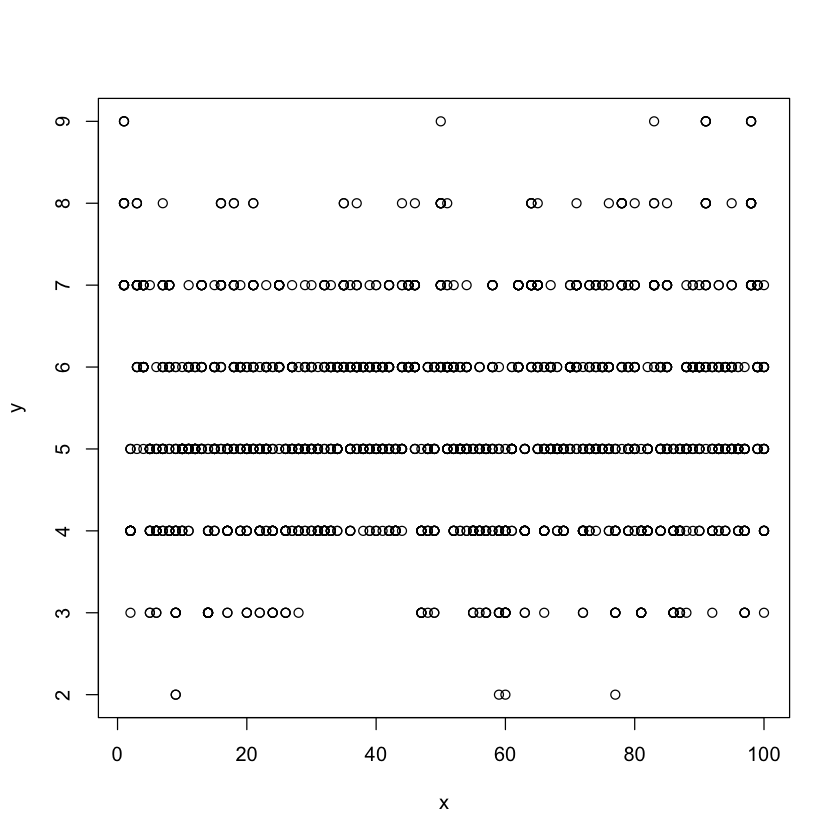

In [9]:
plot(x,y)

Filter nach Schule 1

In [71]:
school1 <- ds.school[which(ds.school$school=="1"),]

In [26]:
m <- mean(school1$popular)
m

[1] 7.55

In [72]:
# Länge eines Vektor / Spalte
l <- length(school1$popular)
# Summe
m <- sum(school1$popular,na.rm=TRUE)

In [73]:
# Summe als eigene Funktion mit einer Schleife
vr <- 0
mysum <- function(vector) {
  s <-0
  for (i in 1:length(vector)) { 
      s <- s + vector[i]
  }
  s
}
m <- mysum(school1$popular)
m

[1] 151

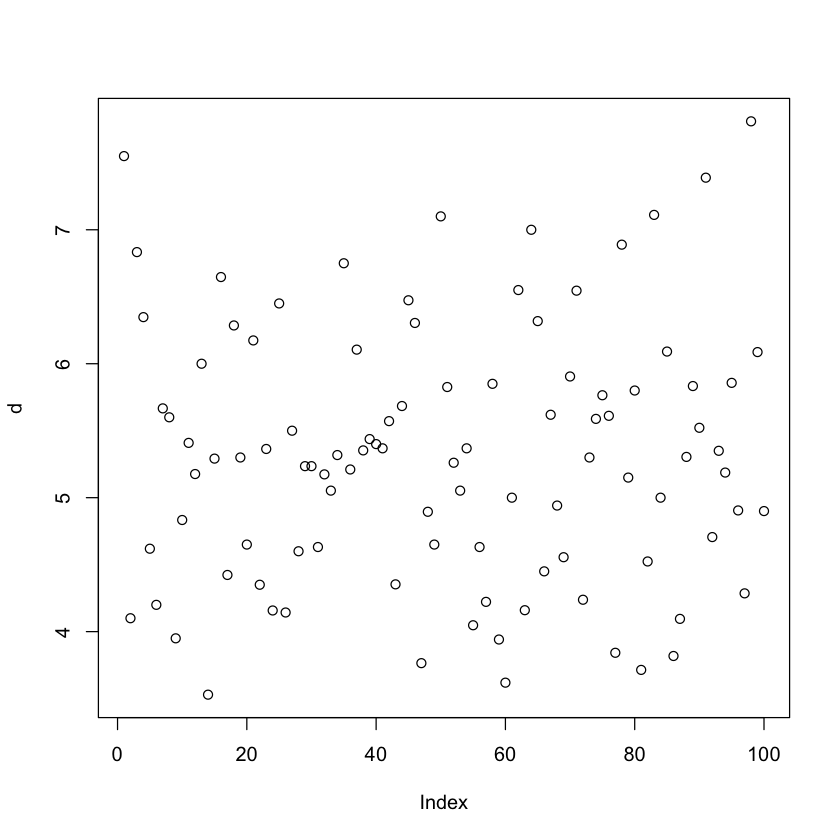

In [78]:
#Vektor erzeugen und ausgeben Mittelwert (Intercept) pro Schule
schools <- unique(ds.school$school)
d <- c()
for (i in 1:length(schools)) { 
   data <- ds.school[which(ds.school$school==i),]
   m <- mean(data$popular)
   d[i] = m
}
plot(d)

# 1. Modell

In [10]:
ds.school.ICC <- lmer(popular ~ 1 + (1|school), data = ds.school)

In [11]:
ds.school.ICC

Linear mixed model fit by REML ['lmerMod']
Formula: popular ~ 1 + (1 | school)
   Data: ds.school
REML criterion at convergence: 5115.587
Random effects:
 Groups   Name        Std.Dev.
 school   (Intercept) 0.9380  
 Residual             0.7992  
Number of obs: 2000, groups:  school, 100
Fixed Effects:
(Intercept)  
      5.308  

In [14]:
summary(ds.school.ICC)

Linear mixed model fit by REML ['lmerMod']
Formula: popular ~ 1 + (1 | school)
   Data: ds.school

REML criterion at convergence: 5115.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.88825 -0.63376 -0.05155  0.71091  3.00393 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.8798   0.9380  
 Residual             0.6387   0.7992  
Number of obs: 2000, groups:  school, 100

Fixed effects:
            Estimate Std. Error t value
(Intercept)   5.3076     0.0955   55.58

# LME4 Tutorial mit Plots 

[https://www.rensvandeschoot.com/tutorials/lme4/](https://www.rensvandeschoot.com/tutorials/lme4/)

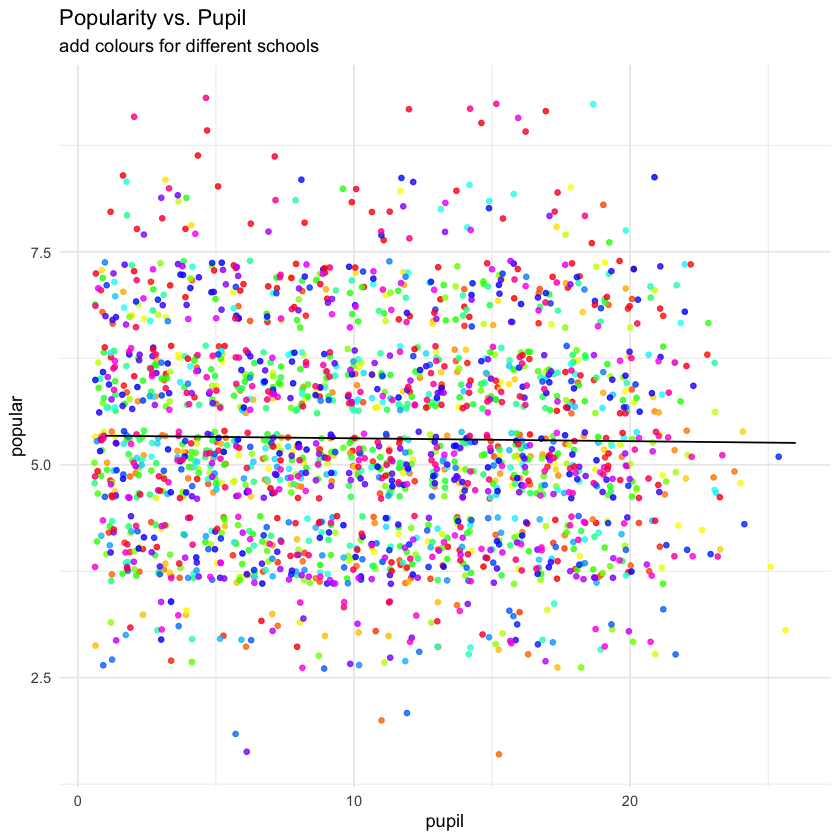

In [55]:
ggplot(data  = ds.school,
       aes(x = pupil,
           y = popular,
          col = school))+
  geom_point(size     = 1.2,
             alpha    = .8,
             position = "jitter")+ #to add some random noise for plotting purposes
  geom_smooth(method = lm,
              se     = FALSE, 
              col    = "black",
              size   = .5, 
              alpha  = .8)+ # to add regression line
  theme_minimal()+
  theme(legend.position = "none")+
  scale_color_gradientn(colours = rainbow(100))+
  labs(title    = "Popularity vs. Pupil",
       subtitle = "add colours for different schools")

# Schritt 2 Random Intercept

Alles was auf individueller Ebene ist

In [15]:
ds.school.randint <- lmer(popular ~ 1 + sex + (1|school), data = ds.school)

In [16]:
summary(ds.school.randint)

Linear mixed model fit by REML ['lmerMod']
Formula: popular ~ 1 + sex + (1 | school)
   Data: ds.school

REML criterion at convergence: 4492.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3184 -0.6892  0.0018  0.5961  3.8239 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.8622   0.9286  
 Residual             0.4599   0.6782  
Number of obs: 2000, groups:  school, 100

Fixed effects:
            Estimate Std. Error t value
(Intercept)  4.89722    0.09530   51.39
sex          0.84370    0.03096   27.25

Correlation of Fixed Effects:
    (Intr)
sex -0.158

In [21]:
test1 <- anova(ds.school.ICC,ds.school.randint)

refitting model(s) with ML (instead of REML)


In [22]:
summary(test1)

       Df            AIC            BIC           logLik         deviance   
 Min.   :3.00   Min.   :4493   Min.   :4515   Min.   :-2556   Min.   :4485  
 1st Qu.:3.25   1st Qu.:4649   1st Qu.:4670   1st Qu.:-2478   1st Qu.:4642  
 Median :3.50   Median :4806   Median :4825   Median :-2399   Median :4799  
 Mean   :3.50   Mean   :4806   Mean   :4825   Mean   :-2399   Mean   :4799  
 3rd Qu.:3.75   3rd Qu.:4962   3rd Qu.:4980   3rd Qu.:-2321   3rd Qu.:4956  
 Max.   :4.00   Max.   :5119   Max.   :5136   Max.   :-2242   Max.   :5113  
                                                                            
     Chisq           Chi Df    Pr(>Chisq)
 Min.   :627.8   Min.   :1   Min.   :0   
 1st Qu.:627.8   1st Qu.:1   1st Qu.:0   
 Median :627.8   Median :1   Median :0   
 Mean   :627.8   Mean   :1   Mean   :0   
 3rd Qu.:627.8   3rd Qu.:1   3rd Qu.:0   
 Max.   :627.8   Max.   :1   Max.   :0   
 NA's   :1       NA's   :1   NA's   :1   

In [59]:
ranova(ds.school.randint)

,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,4,-2246.446,4500.892,NA,NA,NA
(1 | school),3,-3110.807,6227.615,1728.722,1,0


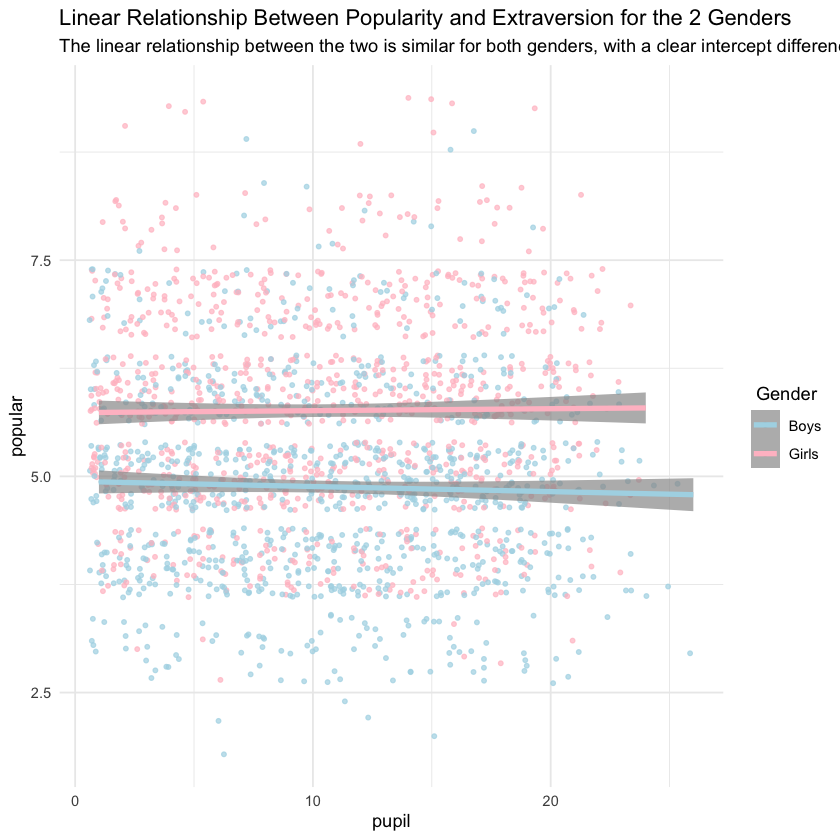

In [57]:
ggplot(data = ds.school, 
       aes(x   = pupil,
           y   = popular, 
           col = as.factor(sex)))+
  geom_point(size     = 1, 
             alpha    = .7, 
             position = "jitter")+
  geom_smooth(method   = lm,
              se       = T, 
              size     = 1.5, 
              linetype = 1, 
              alpha    = .7)+
  theme_minimal()+
  labs(title    = "Linear Relationship Between Popularity and Extraversion for the 2 Genders", 
       subtitle = "The linear relationship between the two is similar for both genders, with a clear intercept difference")+
  scale_color_manual(name   =" Gender",
                     labels = c("Boys", "Girls"),
                     values = c("lightblue", "pink"))

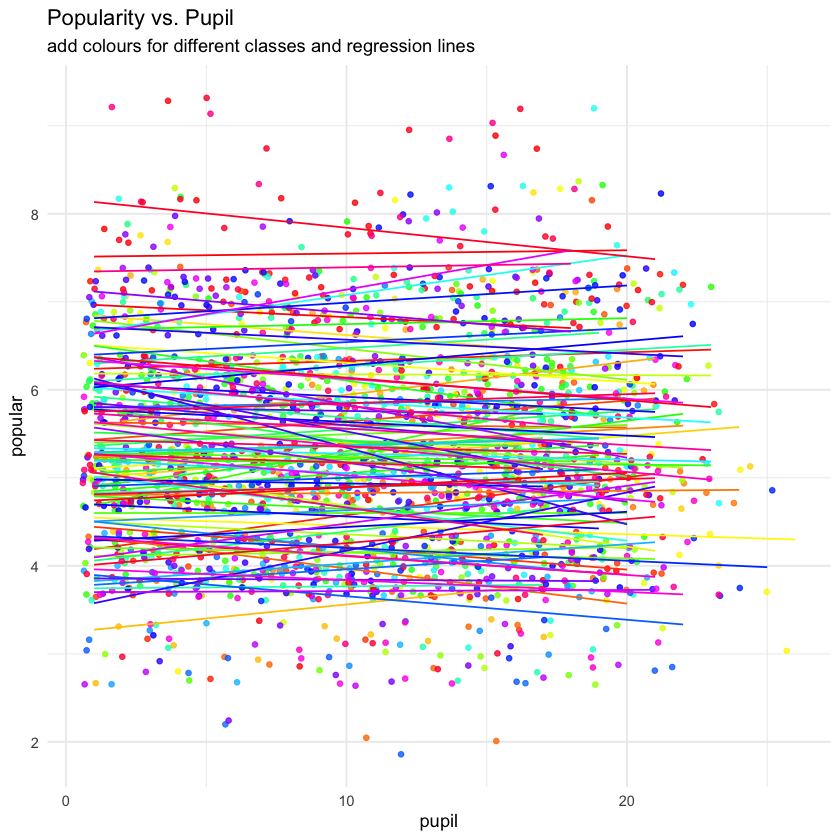

In [56]:
ggplot(data      = ds.school,
       aes(x     = pupil,
           y     = popular,
           col   = school,
           group = school))+ #to add the colours for different classes
  geom_point(size     = 1.2,
             alpha    = .8,
             position = "jitter")+ #to add some random noise for plotting purposes
  theme_minimal()+
  theme(legend.position = "none")+
  scale_color_gradientn(colours = rainbow(100))+
  geom_smooth(method = lm,
              se     = FALSE,
              size   = .5, 
              alpha  = .8)+ # to add regression line
  labs(title    = "Popularity vs. Pupil",
       subtitle = "add colours for different classes and regression lines")

# Schritt 3

HIgher Level
Makro Level

In [17]:
ds.school.S3 <- lmer(popular ~ 1 + sex + texp + (1|school), data = ds.school)

In [19]:
summary(ds.school.S3)

Linear mixed model fit by REML ['lmerMod']
Formula: popular ~ 1 + sex + texp + (1 | school)
   Data: ds.school

REML criterion at convergence: 4444.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3585 -0.6797  0.0244  0.5933  3.7851 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept) 0.4860   0.6971  
 Residual             0.4599   0.6782  
Number of obs: 2000, groups:  school, 100

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.56068    0.17148  20.765
sex          0.84467    0.03095  27.291
texp         0.09345    0.01085   8.609

Correlation of Fixed Effects:
     (Intr) sex   
sex  -0.088       
texp -0.905  0.000

# Modell 4 / Schritt 4
freie Slopes Randomslope Modelle

In [35]:
ds.school.S4 <- lmer(popular ~ 1 + sex + texp + (1+sex|school), data = ds.school)

In [31]:
summary(ds.school.S4)

Linear mixed model fit by REML ['lmerMod']
Formula: popular ~ 1 + sex + texp + (1 + sex | school)
   Data: ds.school

REML criterion at convergence: 4275.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9379 -0.6156  0.0023  0.5304  3.5167 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 school   (Intercept) 0.4116   0.6415       
          sex         0.2733   0.5228   0.06
 Residual             0.3925   0.6265       
Number of obs: 2000, groups:  school, 100

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.33996    0.16078   20.77
sex          0.84315    0.05969   14.13
texp         0.10835    0.01022   10.61

Correlation of Fixed Effects:
     (Intr) sex   
sex  -0.020       
texp -0.908  0.000

In [32]:
test2 <- anova(ds.school.S3,ds.school.S4)

refitting model(s) with ML (instead of REML)


In [33]:
summary(test2)

       Df           AIC            BIC           logLik         deviance   
 Min.   :5.0   Min.   :4275   Min.   :4314   Min.   :-2214   Min.   :4261  
 1st Qu.:5.5   1st Qu.:4316   1st Qu.:4352   1st Qu.:-2193   1st Qu.:4303  
 Median :6.0   Median :4357   Median :4390   Median :-2172   Median :4345  
 Mean   :6.0   Mean   :4357   Mean   :4390   Mean   :-2172   Mean   :4345  
 3rd Qu.:6.5   3rd Qu.:4398   3rd Qu.:4429   3rd Qu.:-2152   3rd Qu.:4387  
 Max.   :7.0   Max.   :4439   Max.   :4467   Max.   :-2131   Max.   :4429  
                                                                           
     Chisq           Chi Df    Pr(>Chisq)
 Min.   :167.4   Min.   :2   Min.   :0   
 1st Qu.:167.4   1st Qu.:2   1st Qu.:0   
 Median :167.4   Median :2   Median :0   
 Mean   :167.4   Mean   :2   Mean   :0   
 3rd Qu.:167.4   3rd Qu.:2   3rd Qu.:0   
 Max.   :167.4   Max.   :2   Max.   :0   
 NA's   :1       NA's   :1   NA's   :1   

# Modell 5 
noch was

In [62]:
ds.school.S5 <- lmer(popular ~ 1 + sex + texp + sex:texp + (1+sex|school), data = ds.school)

In [63]:
summary(ds.school.S5)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: popular ~ 1 + sex + texp + sex:texp + (1 + sex | school)
   Data: ds.school

REML criterion at convergence: 4268.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9337 -0.6519  0.0216  0.5307  3.4883 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 school   (Intercept) 0.4120   0.6419       
          sex         0.2264   0.4758   0.08
 Residual             0.3924   0.6264       
Number of obs: 2000, groups:  school, 100

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  3.313521   0.161014 97.351208  20.579  < 2e-16 ***
sex          1.329594   0.133050 97.111558   9.993  < 2e-16 ***
texp         0.110235   0.010232 97.439203  10.774  < 2e-16 ***
sex:texp    -0.034035   0.008457 97.299743  -4.024 0.000113 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)

In [64]:
test3 <- anova(ds.school.S4,ds.school.S5)

refitting model(s) with ML (instead of REML)


In [65]:
summary(test3)

       Df            AIC            BIC           logLik         deviance   
 Min.   :7.00   Min.   :4262   Min.   :4307   Min.   :-2131   Min.   :4246  
 1st Qu.:7.25   1st Qu.:4265   1st Qu.:4309   1st Qu.:-2129   1st Qu.:4250  
 Median :7.50   Median :4269   Median :4311   Median :-2127   Median :4254  
 Mean   :7.50   Mean   :4269   Mean   :4311   Mean   :-2127   Mean   :4254  
 3rd Qu.:7.75   3rd Qu.:4272   3rd Qu.:4312   3rd Qu.:-2125   3rd Qu.:4257  
 Max.   :8.00   Max.   :4275   Max.   :4314   Max.   :-2123   Max.   :4261  
                                                                            
     Chisq           Chi Df    Pr(>Chisq)      
 Min.   :15.33   Min.   :1   Min.   :9.05e-05  
 1st Qu.:15.33   1st Qu.:1   1st Qu.:9.05e-05  
 Median :15.33   Median :1   Median :9.05e-05  
 Mean   :15.33   Mean   :1   Mean   :9.05e-05  
 3rd Qu.:15.33   3rd Qu.:1   3rd Qu.:9.05e-05  
 Max.   :15.33   Max.   :1   Max.   :9.05e-05  
 NA's   :1       NA's   :1   NA's   :1         

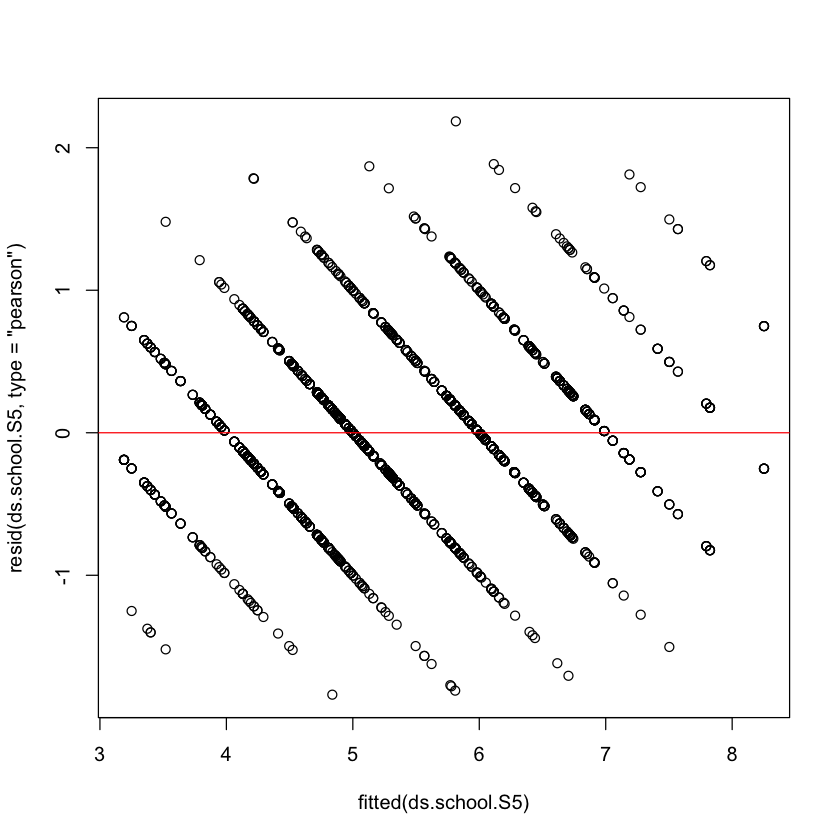

In [68]:
plot(fitted(ds.school.S5), resid(ds.school.S5, type = "pearson"))# this will create the plot
abline(0,0, col="red")

# Speedating

In [33]:
sdating <- read.csv("data/Speed Dating Data.csv",header = TRUE)

In [34]:
## Inspect dataset 
head(sdating) 

iid,id,gender,idg,condtn,wave,round,position,positin1,order,⋯,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,1,1,1,10,7,NA,4,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,3,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,10,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,5,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,7,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,6,⋯,5,7,7,7,7,NA,NA,NA,NA,NA


In [35]:
str(sdating)

'data.frame':	8378 obs. of  195 variables:
 $ iid     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ id      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ idg     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ condtn  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ wave    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ round   : int  10 10 10 10 10 10 10 10 10 10 ...
 $ position: int  7 7 7 7 7 7 7 7 7 7 ...
 $ positin1: int  NA NA NA NA NA NA NA NA NA NA ...
 $ order   : int  4 3 10 5 7 6 1 2 8 9 ...
 $ partner : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pid     : int  11 12 13 14 15 16 17 18 19 20 ...
 $ match   : int  0 0 1 1 1 0 0 0 1 0 ...
 $ int_corr: num  0.14 0.54 0.16 0.61 0.21 0.25 0.34 0.5 0.28 -0.36 ...
 $ samerace: int  0 0 1 0 0 0 0 0 0 0 ...
 $ age_o   : int  27 22 22 23 24 25 30 27 28 24 ...
 $ race_o  : int  2 2 4 2 3 2 2 2 2 2 ...
 $ pf_o_att: num  35 60 19 30 30 ...
 $ pf_o_sin: num  20 0 18 5 10 ...
 $ pf_o_int: num  20 0 19 15 20 ...
 $ pf_o_fun: num  20 40 18 40 10 ...
 $ pf_o_amb: num  0 0 14 5

In [36]:
dim(sdating)

[1] 8378  195

In [57]:
head(sdating,10)

iid,id,gender,idg,condtn,wave,round,position,positin1,order,⋯,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,1,1,1,10,7,NA,4,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,3,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,10,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,5,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,7,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,6,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,1,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,2,⋯,5,7,7,7,7,NA,NA,NA,NA,NA
1,1,0,1,1,1,10,7,NA,8,⋯,5,7,7,7,7,NA,NA,NA,NA,NA


In [48]:
help(filter)